In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:

# Function to preprocess the images
def preprocess_image(image, img_size=(128, 128)):
    # Resize the image to the desired size
    image_resized = cv2.resize(image, img_size)
    # Convert the image to grayscale
    image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    # Normalize the pixel values
    image_normalized = image_gray / 255.0
    # Add channel dimension for compatibility with Conv2D input shape
    image_processed = np.expand_dims(image_normalized, axis=-1)
    return image_processed

# Load genuine and forged images
real_path = '/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/genuine'
forge_path = '/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/forged'

img_size = (128, 128)

real_images = []
for img_name in os.listdir(real_path):
    img = cv2.imread(os.path.join(real_path, img_name))
    preprocessed_img = preprocess_image(img, img_size)
    real_images.append(preprocessed_img)

forge_images = []
for img_name in os.listdir(forge_path):
    img = cv2.imread(os.path.join(forge_path, img_name))
    preprocessed_img = preprocess_image(img, img_size)
    forge_images.append(preprocessed_img)

In [ ]:
# Create labels for genuine (0) and forged (1) signatures
real_labels = np.zeros(len(real_images))
forge_labels = np.ones(len(forge_images))

# Combine data and labels
X_data = np.concatenate((real_images, forge_images), axis=0)
y_labels = np.concatenate((real_labels, forge_labels), axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected layers
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/30
29/29 [==============================] - 2s 29ms/step - loss: 0.0538 - accuracy: 0.9793 - val_loss: 1.0180 - val_accuracy: 0.7565
Epoch 2/30
29/29 [==============================] - 1s 19ms/step - loss: 0.0261 - accuracy: 0.9935 - val_loss: 1.1870 - val_accuracy: 0.7348
Epoch 3/30
29/29 [==============================] - 1s 18ms/step - loss: 0.0172 - accuracy: 0.9956 - val_loss: 1.2550 - val_accuracy: 0.7696
Epoch 4/30
29/29 [==============================] - 1s 18ms/step - loss: 0.0291 - accuracy: 0.9924 - val_loss: 1.0642 - val_accuracy: 0.7435
Epoch 5/30
29/29 [==============================] - 1s 19ms/step - loss: 0.0168 - accuracy: 0.9989 - val_loss: 1.2579 - val_accuracy: 0.7261
Epoch 6/30
29/29 [==============================] - 1s 19ms/step - loss: 0.0330 - accuracy: 0.9891 - val_loss: 0.9055 - val_accuracy: 0.7478
Epoch 7/30
29/29 [==============================] - 0s 17ms/step - loss: 0.0203 - accuracy: 0.9946 - val_loss: 1.0838 - val_accuracy: 0.7652
Epoch 8/30
29

In [ ]:
model.save("/content/drive/MyDrive/JETTI PROJECTS/MINI project/Trained_model_files/team_collected_data_cnn_74.35%.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int)

# Convert the labels to integers directly
y_test_int = np.array(y_test, dtype=int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_int, y_pred_classes))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_classes)
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


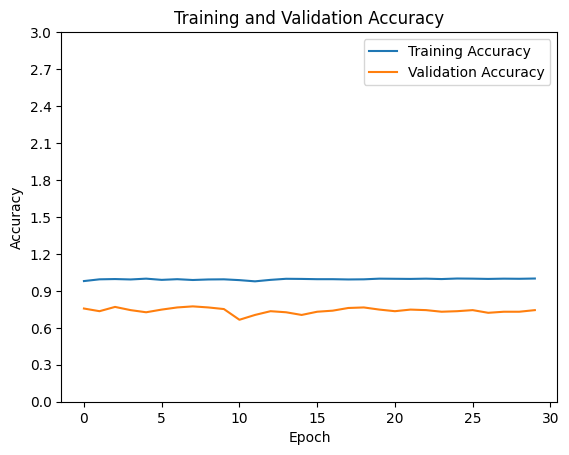

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.yticks(np.arange(0, 3.1, 0.3))
plt.show()

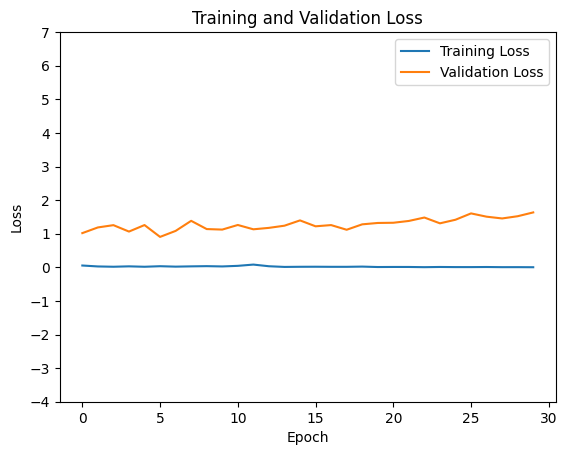

In [ ]:

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.yticks(np.arange(-4, 7.1, 1))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

forge images

/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/forged/IMG-20240213-WA0091.jpg
/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/forged/IMG-20240213-WA0090.jpg
/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/forged/IMG-20240213-WA0098.jpg
/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/forged/IMG-20240213-WA0109.jpg

real images

/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/genuine/05403054.jpg

/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/genuine/05404054.jpg

/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/genuine/05603056.jpg

/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/genuine/05702057.jpg

In [ ]:
import cv2
import numpy as np

# Function to preprocess the image
def preprocess_image(image_path, img_size=(128, 128)):
    # Read the image
    image = cv2.imread(image_path)
    # Resize the image
    image_resized = cv2.resize(image, img_size)
    # Convert the image to grayscale
    image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    # Normalize the pixel values
    image_normalized = image_gray / 255.0
    # Add channel dimension for compatibility with Conv2D input shape
    image_processed = np.expand_dims(image_normalized, axis=-1)
    return image_processed

# Path to the image you want to test
image_path = '/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/forged/IMG-20240213-WA0109.jpg'

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Reshape the image to match the input shape of the model
input_image = np.expand_dims(preprocessed_image, axis=0)

# Make predictions
prediction = model.predict(input_image)

# Convert the prediction to a readable format
result = "Forged" if prediction[0][0] > 0.5 else "Genuine"

# Print the result
print(f"The signature is predicted as: {result}")


1/1 [==============================] - 0s 131ms/step
The signature is predicted as: Forged


In [ ]:
import cv2
import numpy as np

# Function to preprocess the image
def preprocess_image(image_path, img_size=(128, 128)):
    # Read the image
    image = cv2.imread(image_path)
    # Resize the image
    image_resized = cv2.resize(image, img_size)
    # Convert the image to grayscale
    image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    # Normalize the pixel values
    image_normalized = image_gray / 255.0
    # Add channel dimension for compatibility with Conv2D input shape
    image_processed = np.expand_dims(image_normalized, axis=-1)
    return image_processed

# Path to the image you want to test
image_path = '/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/genuine/05404054.jpg'

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Reshape the image to match the input shape of the model
input_image = np.expand_dims(preprocessed_image, axis=0)

# Make predictions
prediction = model.predict(input_image)

# Convert the prediction to a readable format
result = "Forged" if prediction[0][0] > 0.5 else "Genuine"

# Print the result
print(f"The signature is predicted as: {result}")


1/1 [==============================] - 0s 23ms/step
The signature is predicted as: Genuine
